In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory="data/train"
)
test_ds=tf.keras.utils.image_dataset_from_directory(
    directory="data/test"
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    directory="data/valid"
)

Found 4000 files belonging to 2 classes.
Found 300 files belonging to 2 classes.
Found 300 files belonging to 2 classes.


In [3]:
CLASSES=train_ds.class_names
print(CLASSES)

['average', 'beautiful']


In [4]:
train_ds=train_ds.shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds=test_ds.shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds=val_ds.shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [8]:
model_1=tf.keras.Sequential([
    layers.Conv2D(32,(3,3),input_shape=(256,256,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,(3,3),input_shape=(256,256,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,(3,3),input_shape=(256,256,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,(3,3),input_shape=(256,256,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,(3,3),input_shape=(256,256,3),activation="relu"),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [9]:
model_1.build((256,256,3))

In [10]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 32)       

In [11]:
model_1.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
model_1.fit(train_ds,batch_size=32,epochs=5,validation_data=val_ds)

Epoch 1/5
125/125 [==============================] - 87s 680ms/step - loss: 1.2108 - accuracy: 0.6330 - val_loss: 0.5253 - val_accuracy: 0.8067
Epoch 2/5
125/125 [==============================] - 105s 831ms/step - loss: 0.5627 - accuracy: 0.7560 - val_loss: 0.5653 - val_accuracy: 0.7700
Epoch 3/5
125/125 [==============================] - 107s 838ms/step - loss: 0.4724 - accuracy: 0.7855 - val_loss: 0.4065 - val_accuracy: 0.8400
Epoch 4/5
125/125 [==============================] - 106s 836ms/step - loss: 0.4256 - accuracy: 0.8170 - val_loss: 0.3558 - val_accuracy: 0.8500
Epoch 5/5
125/125 [==============================] - 108s 851ms/step - loss: 0.3853 - accuracy: 0.8422 - val_loss: 0.3428 - val_accuracy: 0.8600


In [14]:
model_1.evaluate(test_ds)

10/10 [==============================] - 2s 190ms/step - loss: 0.3092 - accuracy: 0.8933


[0.30918776988983154, 0.8933333158493042]

1/1 [==============================] - 0s 214ms/step
model prediction: beautiful


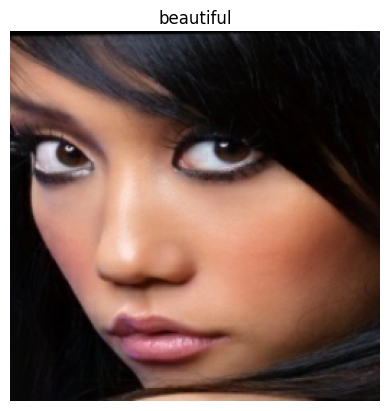

In [19]:
for image,label in test_ds.take(1).as_numpy_iterator():
    plt.title(CLASSES[label[0]])
    plt.imshow(image[0]/255.)
    plt.axis("off")
    y_pred=model_1.predict(image)
    print(f"model prediction: {CLASSES[round(y_pred[0][0])]}")

In [20]:
model_1.save("../saved_models/1")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets
